# Prepare a classification model using Naive Bayes for salary data

## Data Description

- age : age of a person
- workclass	: A work class is a grouping of work 
- education	: Education of an individuals	
- maritalstatus : Marital status of an individulas	
- occupation : occupation of an individuals
- relationship : 	
- race :  Race of an Individual
- sex :  Gender of an Individual
- capitalgain :  profit received from the sale of an investment	
- capitalloss	: A decrease in the value of a capital asset
- hoursperweek : number of hours work per week	
- native : Native of an individual
- Salary : salary of an individual

## Attaching Resources

### Importing Necessary Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

### Adding Dataset

In [2]:
sd_train = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Data-Science-Assignments/main/Assignment_12_Naive%20Bayes/Dataset/SalaryData_Train.csv')

sd_train

age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
0            Adm-clerical   Not-in-family   White     Male         2174   
1         Exec-managerial         Husband   White     Male            0   
2       Handlers-cleaners   Not-in-family   White     Male            0   
3       Handlers-cleaners         Husband   Black     Male            0   
4          Prof-specialty            Wife   Black   Female            0   
...                   ...             ...     ...      ...          ...   
30156        Tech-support            Wife   White   Female            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30158        Adm-clerical       Unmarried   White   Female            0   
30159        Adm-clerical       Own-child   White     Male            0   
30160     Exec-managerial            Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
0                0            40   United-States   <=50K  
1                0            13   United-States   <=50K  
2                0            40   United-States   <=50K  
3                0            40   United-States   <=50K  
4                0            40            Cuba   <=50K  
...            ...           ...             ...     ...  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K  

[30161 rows x 14 columns]

In [3]:
sd_test = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Data-Science-Assignments/main/Assignment_12_Naive%20Bayes/Dataset/SalaryData_Test.csv')

sd_test

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0                0            0            40   United-States   <=50K  
1                0            0            50   United-States   <=50K  
2                0            0            40   United-States    >50K  
3             7688            0            40   United-States    >50K  
4                0            0            30   United-States   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[15060 rows x 14 columns]

## Performing EDA In Train Dataset

### Applying Descriptive Statistics

In [4]:
sd_train.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000
mean      38.438115     10.121316   1092.044064     88.302311     40.931269
std       13.134830      2.550037   7406.466611    404.121321     11.980182
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000

In [5]:
sd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
sd_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
                str(len(df[df.columns[i]].unique())))


In [8]:
uni(sd_train)


 All Unique Value in age
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 88 90]
Total no of unique values 72

 All Unique Value in workclass
[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay']
Total no of unique values 7

 All Unique Value in education
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
Total no of unique values 16

 All Unique Value in educationno
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Total no of unique values 16

 All Unique Value in maritalstatus
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
Total no of unique values 7

 All Uniq

### Checking for Duplicated Values

In [9]:
sd_train[sd_train.duplicated()]

age workclass      education  educationno        maritalstatus  \
326     33   Private      Bachelors           13   Married-civ-spouse   
364     27   Private      Bachelors           13        Never-married   
518     24   Private        HS-grad            9        Never-married   
525     24   Private        HS-grad            9        Never-married   
619     33   Private      Bachelors           13   Married-civ-spouse   
...    ...       ...            ...          ...                  ...   
30110   47   Private        HS-grad            9   Married-civ-spouse   
30118   20   Private        HS-grad            9        Never-married   
30132   22   Private   Some-college           10        Never-married   
30157   40   Private        HS-grad            9   Married-civ-spouse   
30159   22   Private        HS-grad            9        Never-married   

               occupation    relationship    race      sex  capitalgain  \
326       Exec-managerial         Husband   White     Male            0   
364          Craft-repair   Not-in-family   White     Male            0   
518     Handlers-cleaners       Unmarried   Black   Female            0   
525          Craft-repair       Own-child   White     Male            0   
619       Exec-managerial         Husband   White     Male            0   
...                   ...             ...     ...      ...          ...   
30110        Craft-repair         Husband   White     Male            0   
30118   Machine-op-inspct       Own-child   White     Male            0   
30132        Adm-clerical       Own-child   White     Male            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30159        Adm-clerical       Own-child   White     Male            0   

       capitalloss  hoursperweek          native  Salary  
326              0            40   United-States    >50K  
364              0            50   United-States   <=50K  
518              0            40   United-States   <=50K  
525              0            40   United-States   <=50K  
619              0            40   United-States    >50K  
...            ...           ...             ...     ...  
30110            0            40   United-States   <=50K  
30118            0            40   United-States   <=50K  
30132            0            40   United-States   <=50K  
30157            0            40   United-States    >50K  
30159            0            20   United-States   <=50K  

[3258 rows x 14 columns]

In [10]:
sd_train.drop_duplicates(inplace = True)

In [11]:
sd_train[sd_train.duplicated()]

Empty DataFrame
Columns: [age, workclass, education, educationno, maritalstatus, occupation, relationship, race, sex, capitalgain, capitalloss, hoursperweek, native, Salary]
Index: []

- There is no duplicate vale in are dataset

### Visualizing The Data

#### Ploting Boxplot

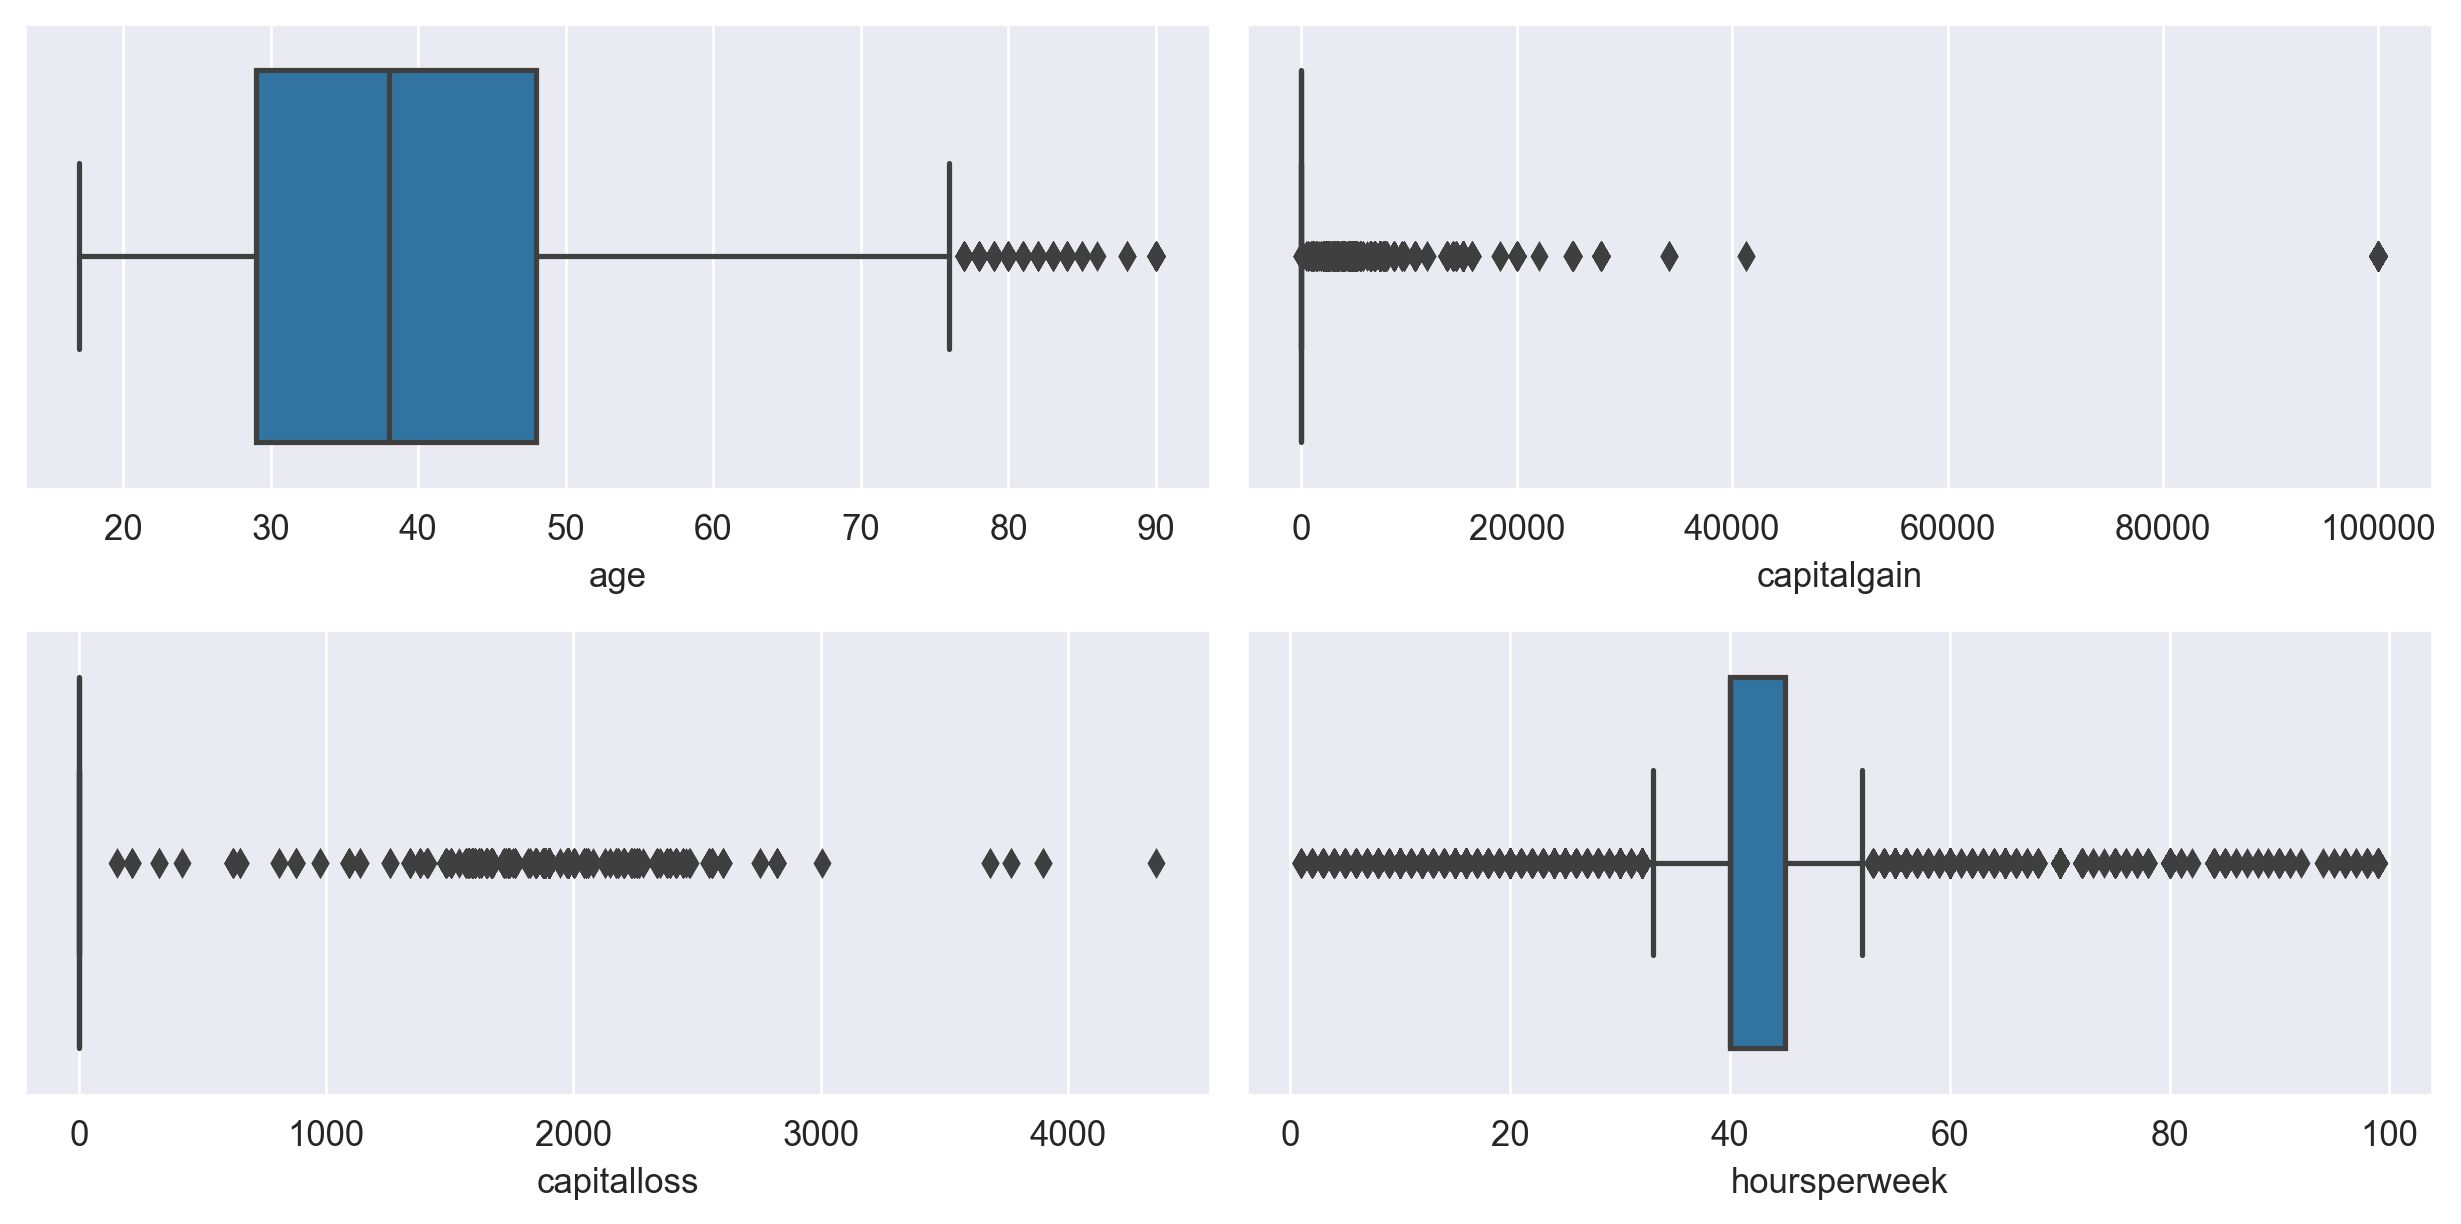

In [12]:
fig, ax = plt.subplots(2,2)

sns.boxplot(sd_train['age'], ax = ax[0,0])
sns.boxplot(sd_train['capitalgain'], ax = ax[0,1])
sns.boxplot(sd_train['capitalloss'], ax = ax[1,0])
sns.boxplot(sd_train['hoursperweek'], ax = ax[1,1])

plt.tight_layout()

#### Ploting Histplot

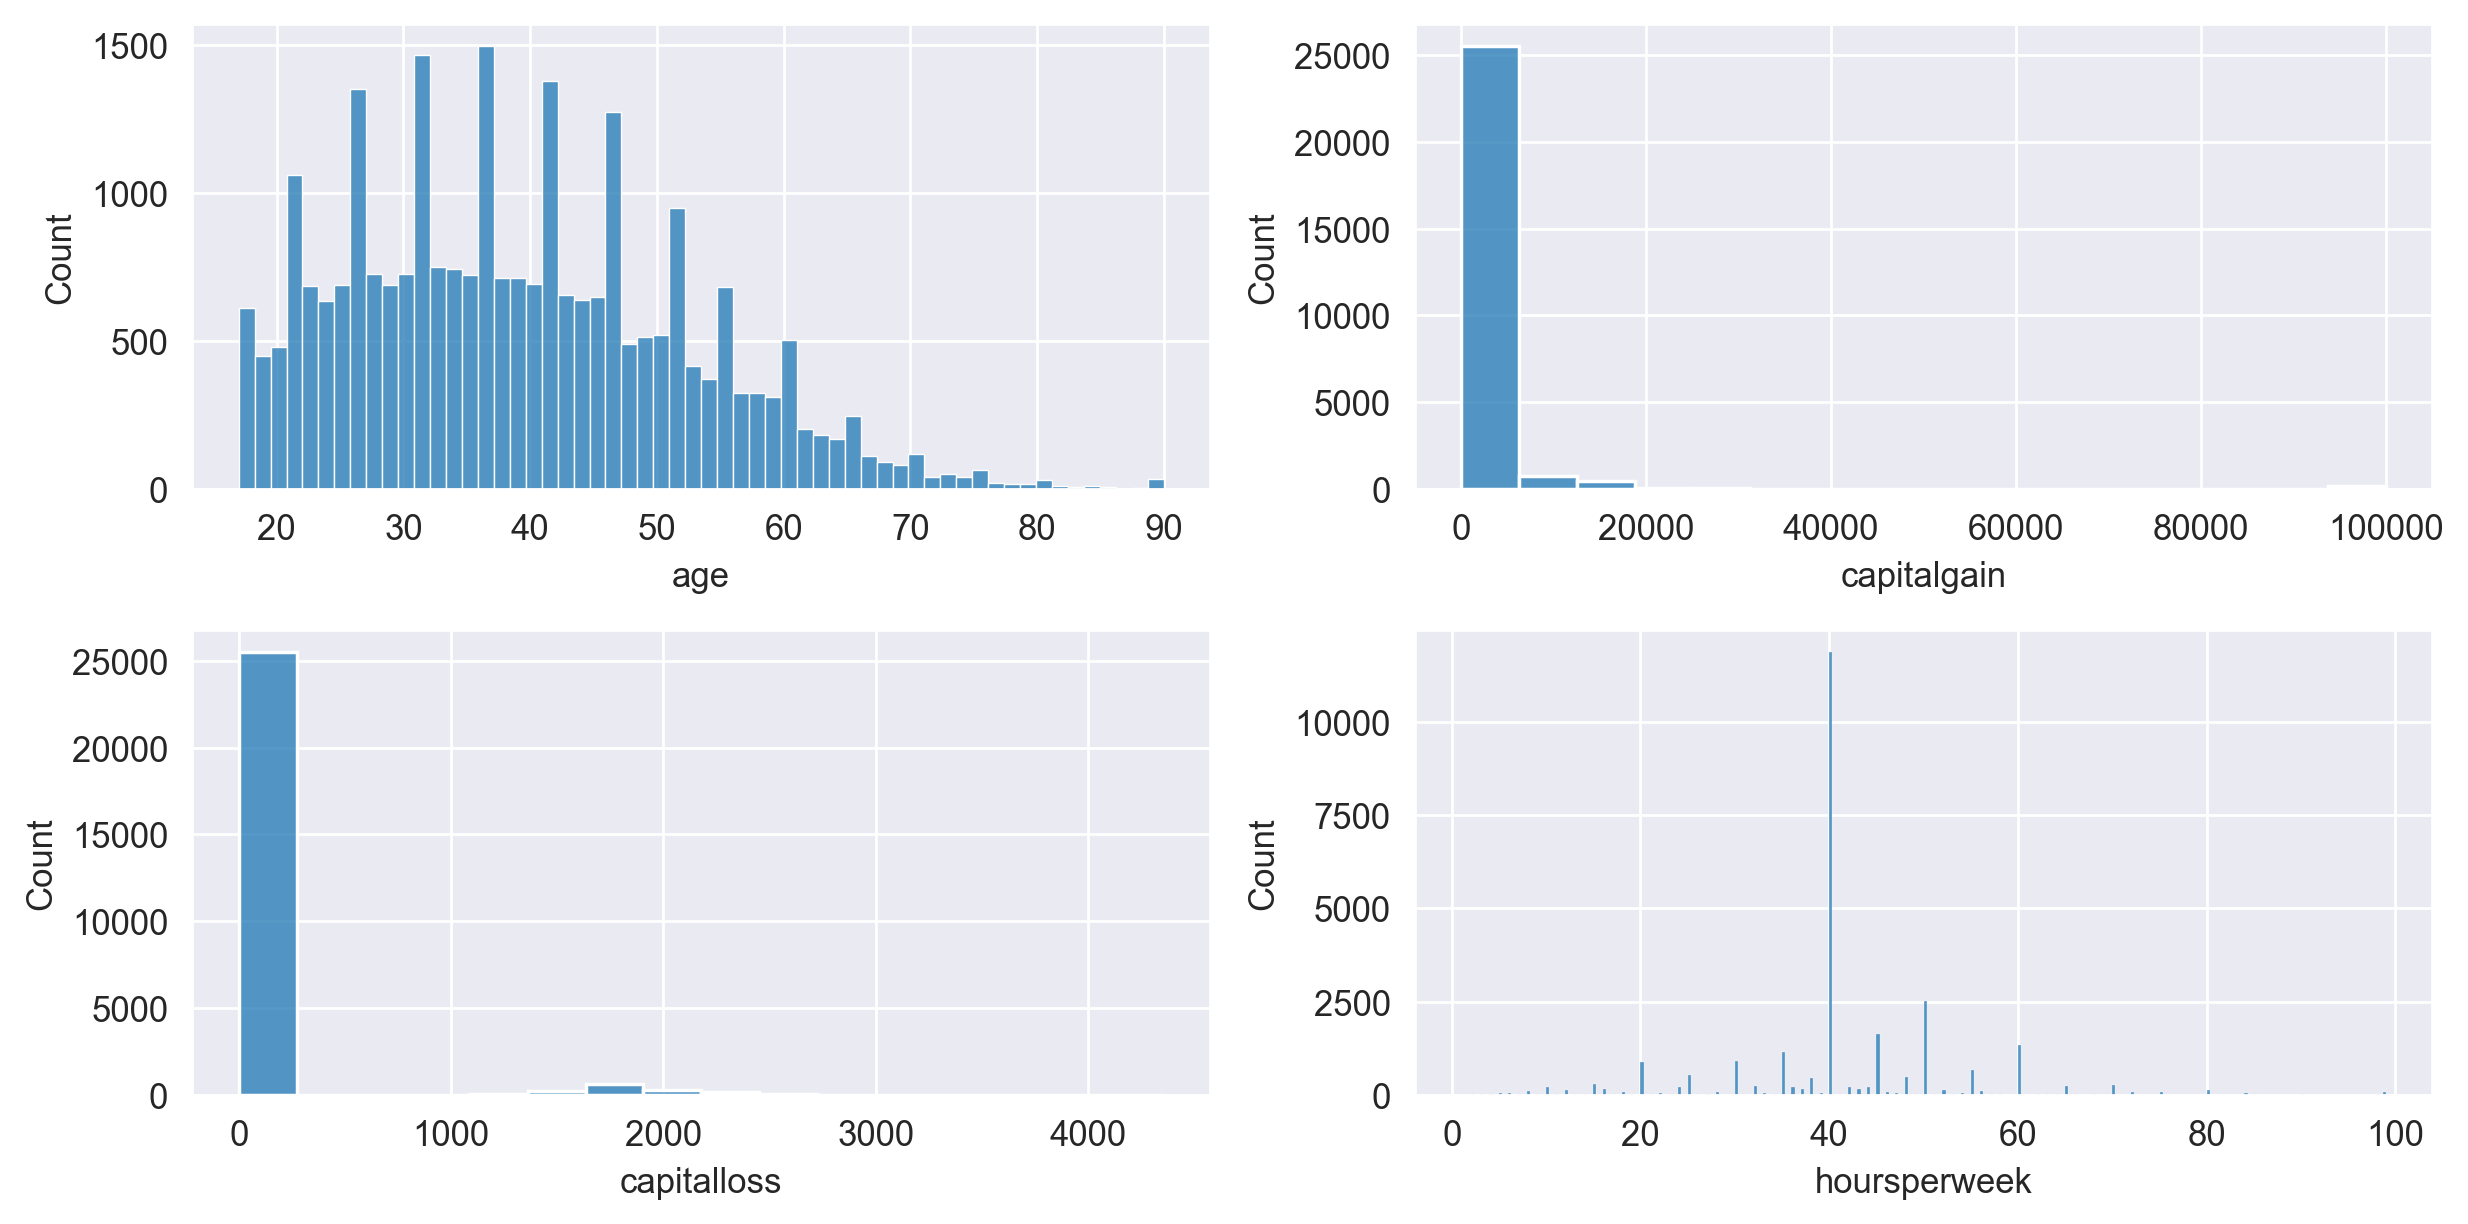

In [13]:
fig, ax = plt.subplots(2,2)

sns.histplot(sd_train['age'], ax = ax[0,0])
sns.histplot(sd_train['capitalgain'], ax = ax[0,1])
sns.histplot(sd_train['capitalloss'], ax = ax[1,0])
sns.histplot(sd_train['hoursperweek'], ax = ax[1,1])

plt.tight_layout()

#### Ploting QQ - Plot

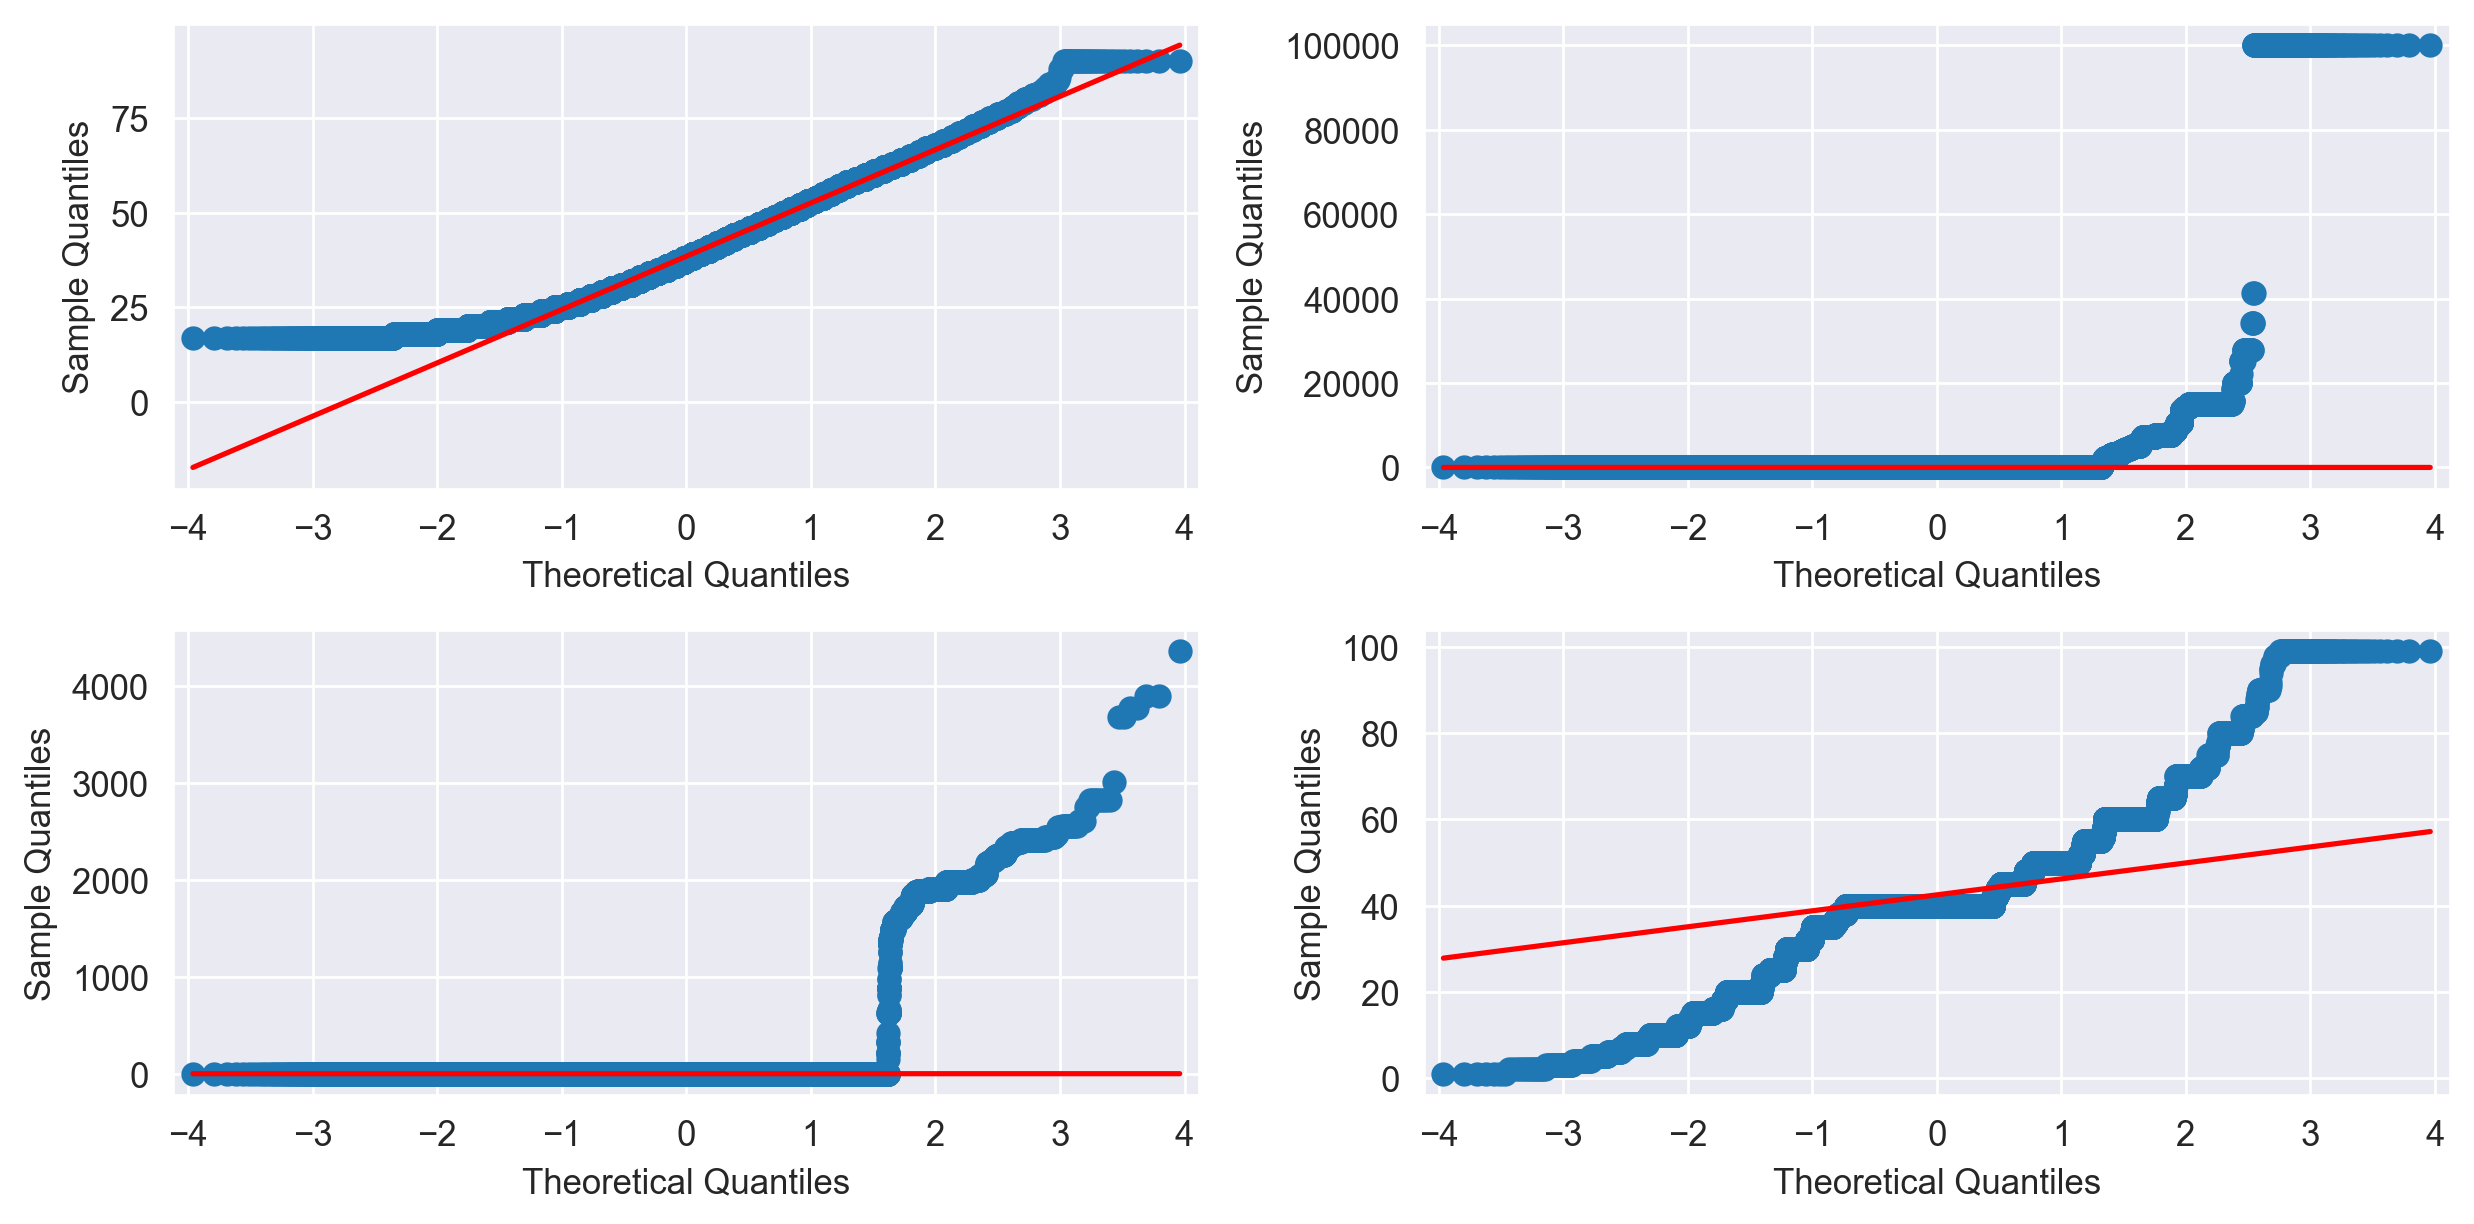

In [14]:
fig, ax = plt.subplots(2,2)

sm.qqplot(sd_train['age'], ax = ax[0,0], line = 'q')
sm.qqplot(sd_train['capitalgain'], ax = ax[0,1], line = 'q')
sm.qqplot(sd_train['capitalloss'], ax = ax[1,0], line = 'q')
sm.qqplot(sd_train['hoursperweek'], ax = ax[1,1], line = 'q')
plt.tight_layout()

### Converting Categorical Data To Numerical Data

#### Converting Independent Column Using Get Dummies

In [ ]:
le = LabelEncoder()

sd_train_gd = pd.get_dummies(sd_train, columns = ['workclass', 'education', 'educationno', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native'])
sd_train_gd['Salary'] = le.fit_transform(sd_train_gd['Salary'])

sd_train_gd

age  capitalgain  capitalloss  hoursperweek  Salary  \
0       39         2174            0            40       0   
1       50            0            0            13       0   
2       38            0            0            40       0   
3       53            0            0            40       0   
4       28            0            0            40       0   
...    ...          ...          ...           ...     ...   
30154   53            0            0            40       1   
30155   22            0            0            40       0   
30156   27            0            0            38       0   
30158   58            0            0            40       0   
30160   52        15024            0            40       1   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           0                     0                   1   
3                           0                     0                   1   
4                           0                     0                   1   
...                       ...                   ...                 ...   
30154                       0                     0                   1   
30155                       0                     0                   1   
30156                       0                     0                   1   
30158                       0                     0                   1   
30160                       0                     0                   0   

       workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                            0                            0  ...   
1                            0                            1  ...   
2                            0                            0  ...   
3                            0                            0  ...   
4                            0                            0  ...   
...                        ...                          ...  ...   
30154                        0                            0  ...   
30155                        0                            0  ...   
30156                        0                            0  ...   
30158                        0                            0  ...   
30160                        1                            0  ...   

       native_ Portugal  native_ Puerto-Rico  native_ Scotland  native_ South  \
0                     0                    0                 0              0   
1                     0                    0                 0              0   
2                     0                    0                 0              0   
3                     0                    0                 0              0   
4                     0                    0                 0              0   
...                 ...                  ...               ...            ...   
30154                 0                    0                 0              0   
30155                 0                    0                 0              0   
30156                 0                    0                 0              0   
30158                 0                    0                 0              0   
30160                 0                    0                 0              0   

       native_ Taiwan  native_ Thailand  native_ Trinadad&Tobago  \
0                   0                 0                        0   
1                   0                 0                        0   
2                   0                 0                        0   
3                   0                 0                        0   
4                   0                 0                        0   
...               ...               ...                      ...   
30154               0                 0                        0   
30155               0      

## Performing EDA In Test Dataset

### Applying Descriptive Statistics

In [15]:
sd_test.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  15060.000000  15060.000000  15060.000000  15060.000000  15060.000000
mean      38.768327     10.112749   1120.301594     89.041899     40.951594
std       13.380676      2.558727   7703.181842    406.283245     12.062831
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       48.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   3770.000000     99.000000

In [16]:
sd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [17]:
sd_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [18]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
                str(len(df[df.columns[i]].unique())))


In [19]:
uni(sd_test)


 All Unique Value in age
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 87 88 89
 90]
Total no of unique values 73

 All Unique Value in workclass
[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay']
Total no of unique values 7

 All Unique Value in education
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
Total no of unique values 16

 All Unique Value in educationno
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Total no of unique values 16

 All Unique Value in maritalstatus
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
Total no of unique values 7

 All 

### Checking for Duplicated Values

In [20]:
sd_test[sd_test.duplicated()]

age workclass      education  educationno        maritalstatus  \
551     59   Private        HS-grad            9             Divorced   
601     32   Private        HS-grad            9   Married-civ-spouse   
681     40   Private        HS-grad            9   Married-civ-spouse   
799     24   Private      Bachelors           13        Never-married   
1044    44   Private    Prof-school           15   Married-civ-spouse   
...    ...       ...            ...          ...                  ...   
15043   51   Private        HS-grad            9   Married-civ-spouse   
15044   22   Private   Some-college           10        Never-married   
15049   32   Private        HS-grad            9   Married-civ-spouse   
15052   31   Private        HS-grad            9   Married-civ-spouse   
15053   25   Private        HS-grad            9        Never-married   

               occupation    relationship    race      sex  capitalgain  \
551         Other-service   Not-in-family   White   Female            0   
601                 Sales         Husband   White     Male            0   
681          Craft-repair         Husband   White     Male            0   
799        Prof-specialty   Not-in-family   White     Male            0   
1044       Prof-specialty         Husband   White     Male        99999   
...                   ...             ...     ...      ...          ...   
15043        Craft-repair         Husband   White     Male            0   
15044        Craft-repair       Own-child   White     Male            0   
15049   Handlers-cleaners         Husband   White     Male            0   
15052        Craft-repair         Husband   White     Male            0   
15053       Other-service       Own-child   White   Female            0   

       capitalloss  hoursperweek          native  Salary  
551              0            40   United-States   <=50K  
601              0            40   United-States   <=50K  
681              0            40   United-States   <=50K  
799              0            35   United-States   <=50K  
1044             0            60   United-States    >50K  
...            ...           ...             ...     ...  
15043            0            40   United-States   <=50K  
15044            0            40   United-States   <=50K  
15049            0            40   United-States   <=50K  
15052            0            40   United-States   <=50K  
15053            0            40   United-States   <=50K  

[930 rows x 14 columns]

In [21]:
sd_test.drop_duplicates(inplace = True)

In [22]:
sd_test[sd_test.duplicated()]

Empty DataFrame
Columns: [age, workclass, education, educationno, maritalstatus, occupation, relationship, race, sex, capitalgain, capitalloss, hoursperweek, native, Salary]
Index: []

- There is no duplicate vale in are dataset

### Visualizing The Data

#### Ploting Boxplot

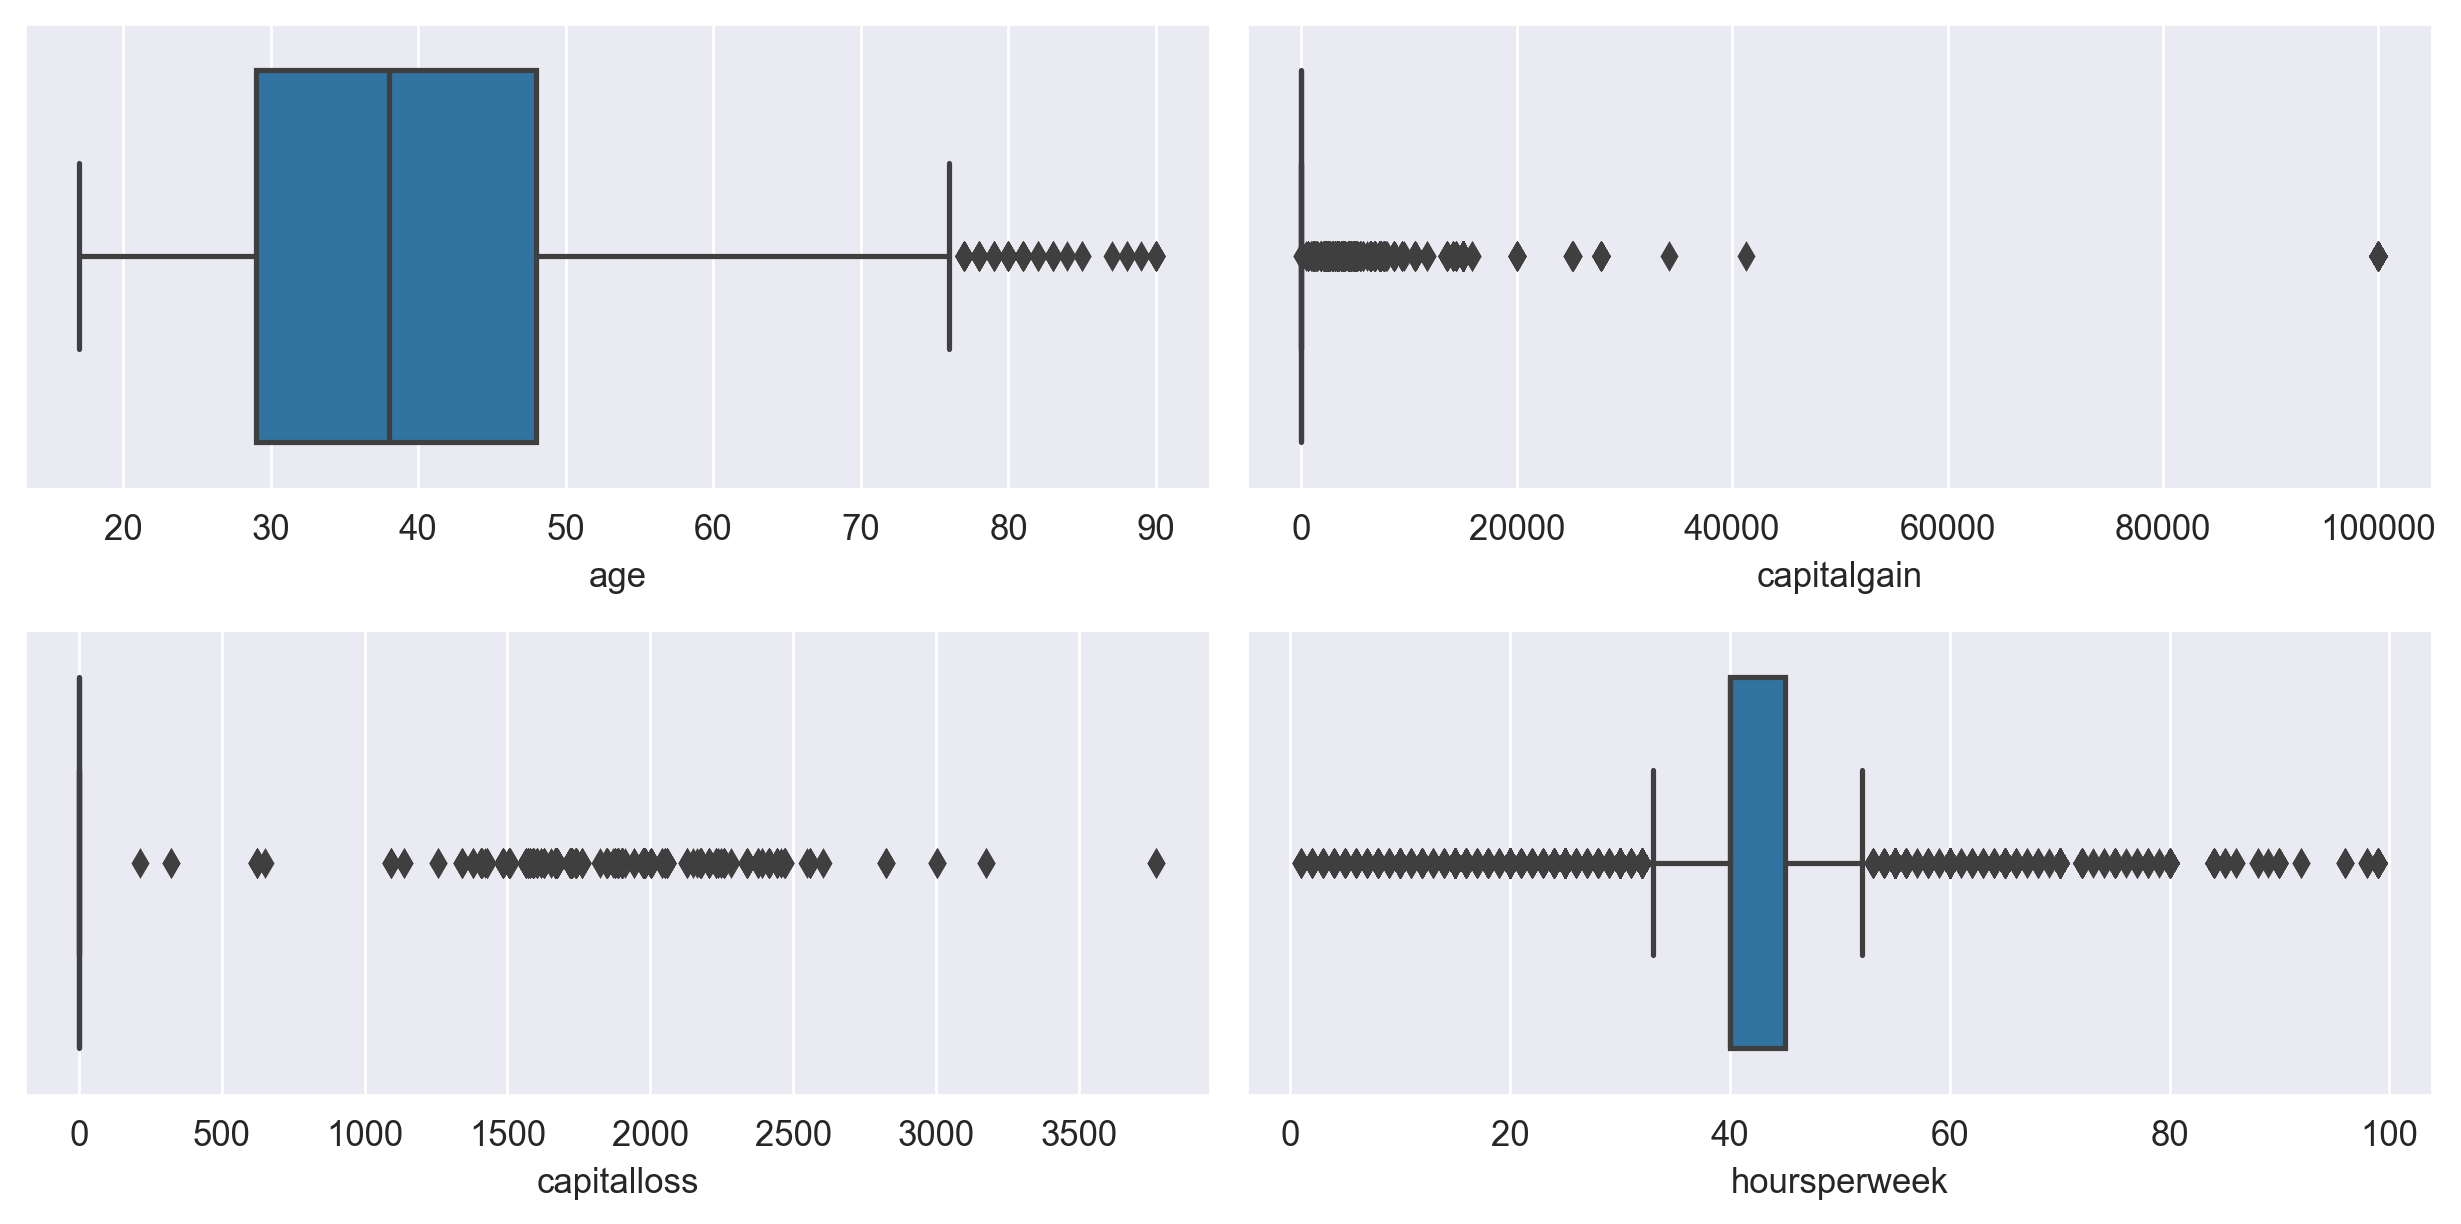

In [23]:
fig, ax = plt.subplots(2,2)

sns.boxplot(sd_test['age'], ax = ax[0,0])
sns.boxplot(sd_test['capitalgain'], ax = ax[0,1])
sns.boxplot(sd_test['capitalloss'], ax = ax[1,0])
sns.boxplot(sd_test['hoursperweek'], ax = ax[1,1])

plt.tight_layout()

#### Ploting Histplot

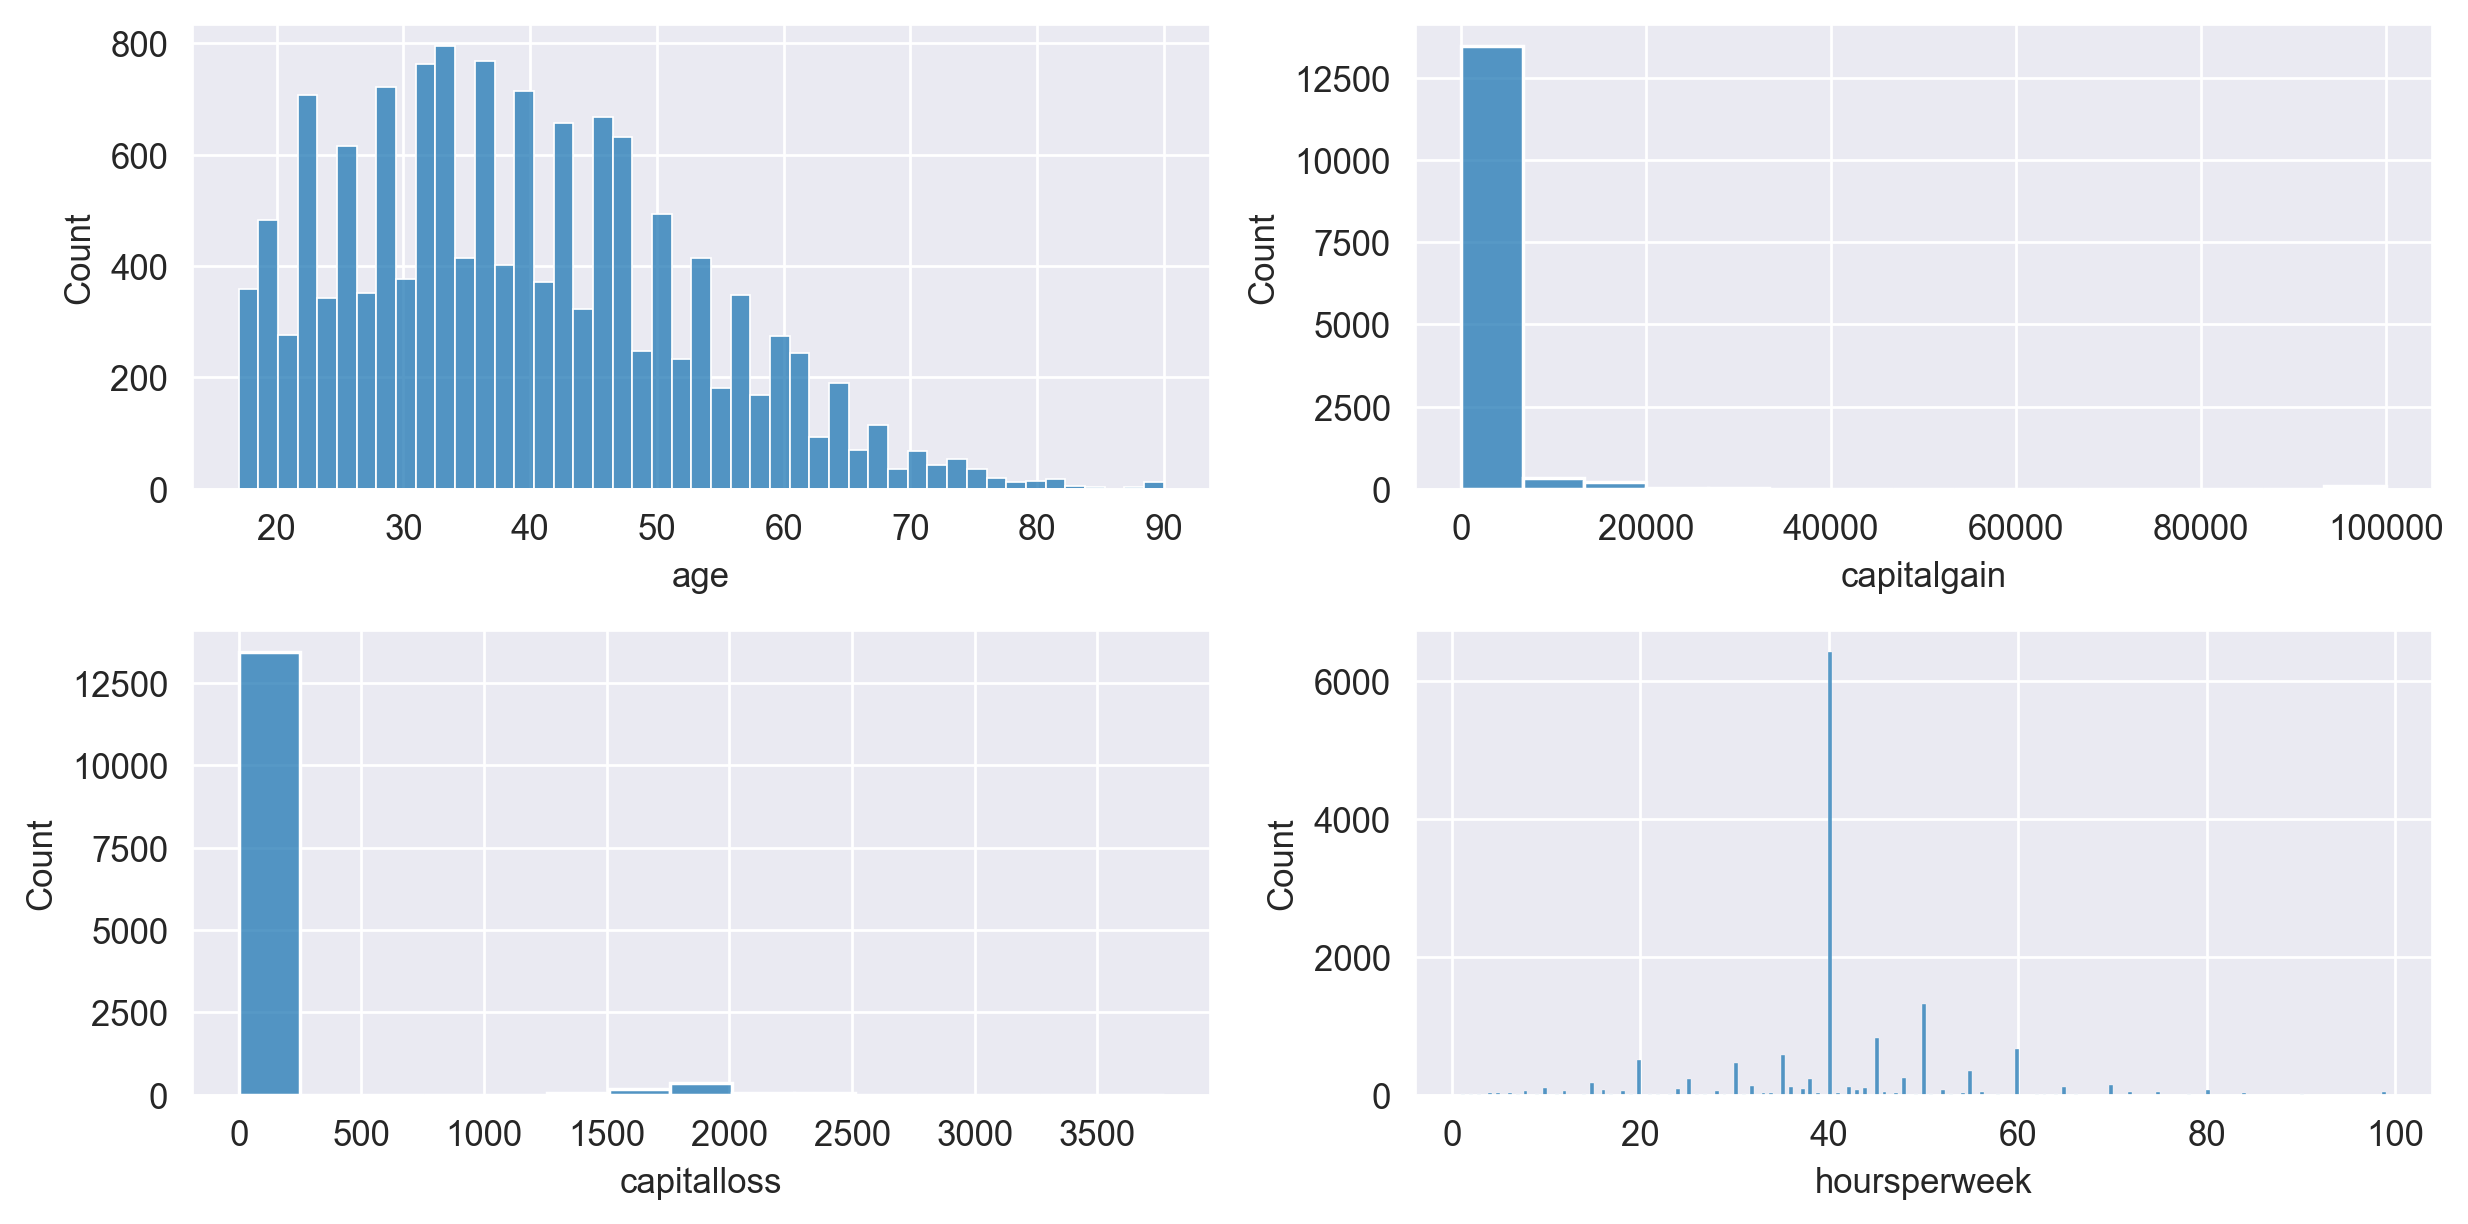

In [24]:
fig, ax = plt.subplots(2,2)

sns.histplot(sd_test['age'], ax = ax[0,0])
sns.histplot(sd_test['capitalgain'], ax = ax[0,1])
sns.histplot(sd_test['capitalloss'], ax = ax[1,0])
sns.histplot(sd_test['hoursperweek'], ax = ax[1,1])

plt.tight_layout()

#### Ploting QQ - Plot

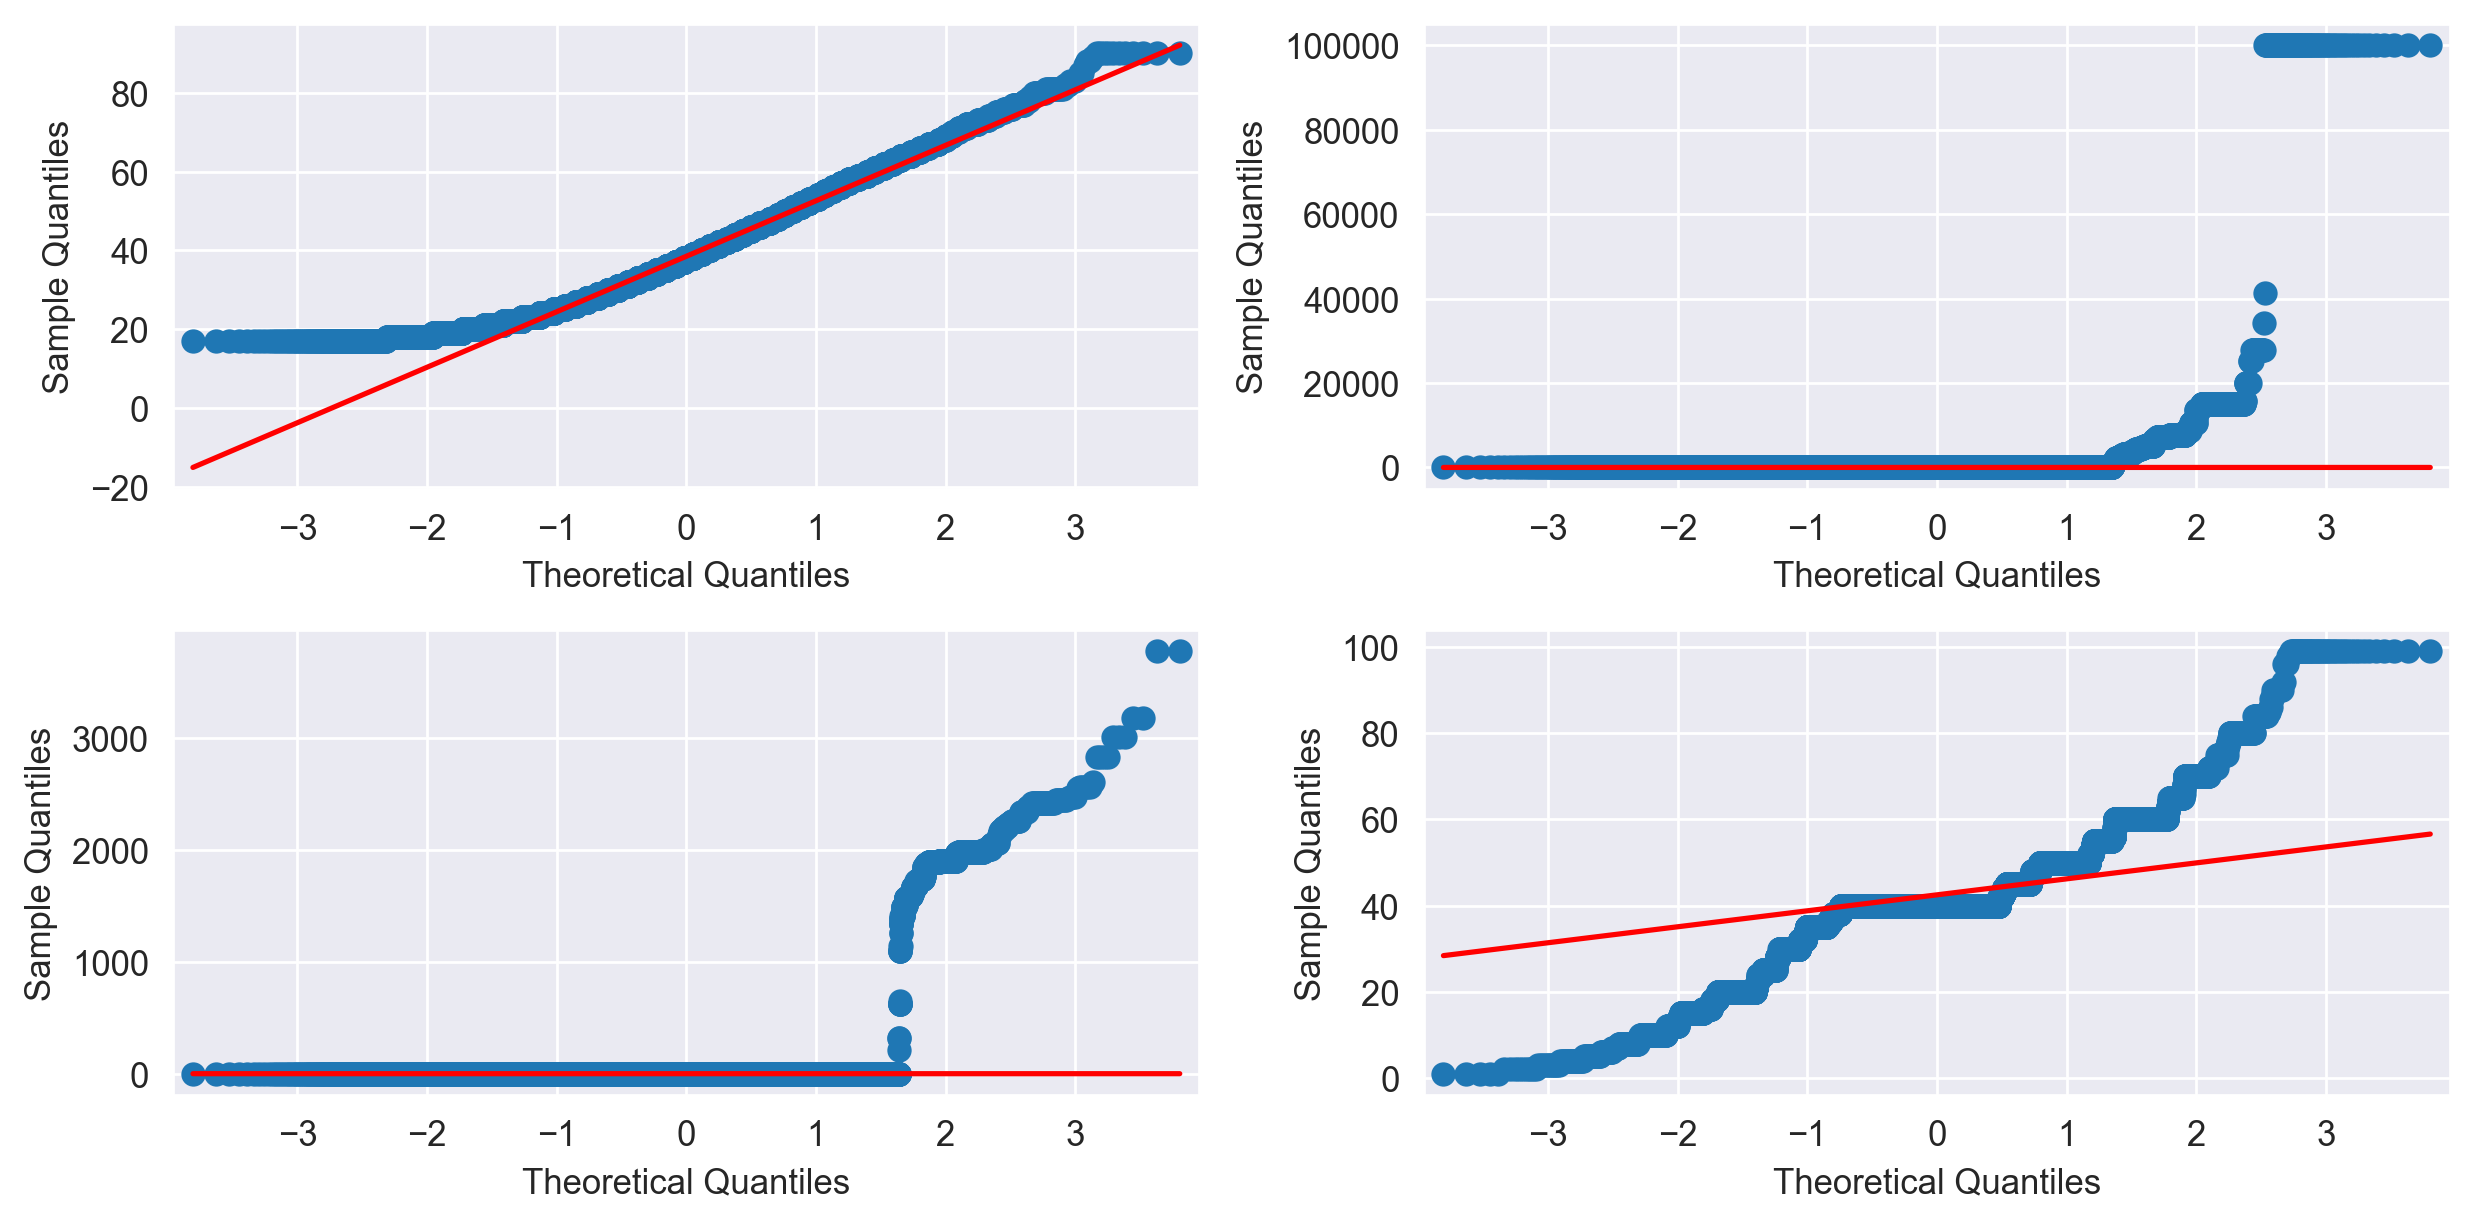

In [25]:
fig, ax = plt.subplots(2,2)

sm.qqplot(sd_test['age'], ax = ax[0,0], line = 'q')
sm.qqplot(sd_test['capitalgain'], ax = ax[0,1], line = 'q')
sm.qqplot(sd_test['capitalloss'], ax = ax[1,0], line = 'q')
sm.qqplot(sd_test['hoursperweek'], ax = ax[1,1], line = 'q')
plt.tight_layout()

### Converting Categorical Data To Numerical Data

#### Converting Independent Column Using Get Dummies

In [36]:
le = LabelEncoder()

sd_test_gd = pd.get_dummies(sd_test, columns = ['workclass', 'education', 'educationno', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native'])
sd_test_gd['Salary'] = le.fit_transform(sd_test_gd['Salary'])

sd_test_gd

age  capitalgain  capitalloss  hoursperweek  Salary  \
0       25            0            0            40       0   
1       38            0            0            50       0   
2       28            0            0            40       1   
3       44         7688            0            40       1   
4       34            0            0            30       0   
...    ...          ...          ...           ...     ...   
15055   33            0            0            40       0   
15056   39            0            0            36       0   
15057   38            0            0            50       0   
15058   44         5455            0            40       0   
15059   35            0            0            60       1   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                           0                     0                   1   
1                           0                     0                   1   
2                           0                     1                   0   
3                           0                     0                   1   
4                           0                     0                   1   
...                       ...                   ...                 ...   
15055                       0                     0                   1   
15056                       0                     0                   1   
15057                       0                     0                   1   
15058                       0                     0                   1   
15059                       0                     0                   0   

       workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                            0                            0  ...   
1                            0                            0  ...   
2                            0                            0  ...   
3                            0                            0  ...   
4                            0                            0  ...   
...                        ...                          ...  ...   
15055                        0                            0  ...   
15056                        0                            0  ...   
15057                        0                            0  ...   
15058                        0                            0  ...   
15059                        1                            0  ...   

       native_ Portugal  native_ Puerto-Rico  native_ Scotland  native_ South  \
0                     0                    0                 0              0   
1                     0                    0                 0              0   
2                     0                    0                 0              0   
3                     0                    0                 0              0   
4                     0                    0                 0              0   
...                 ...                  ...               ...            ...   
15055                 0                    0                 0              0   
15056                 0                    0                 0              0   
15057                 0                    0                 0              0   
15058                 0                    0                 0              0   
15059                 0                    0                 0              0   

       native_ Taiwan  native_ Thailand  native_ Trinadad&Tobago  \
0                   0                 0                        0   
1                   0                 0                        0   
2                   0                 0                        0   
3                   0                 0                        0   
4                   0                 0                        0   
...               ...               ...                      ...   
15055               0                 0                        0   
15056               0      